In [1]:
#Guided, gradient-weighted class activation mapping
#Gradient visualization with guided backpropagation

In [2]:
import math
from scipy import signal as sig
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [3]:
data = sio.loadmat('gradshow_AF.mat')
ecg = data['ecgseg']
ppg = data['ppgseg']
grad = data['gradvalue']
label = data['label']
for i in range(len(label)):
    grad[i,:] =  (grad[i,:]-np.min(grad[i,:]))/(np.max(grad[i,:])-np.min(grad[i,:]))

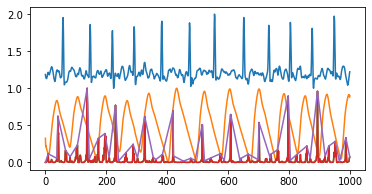

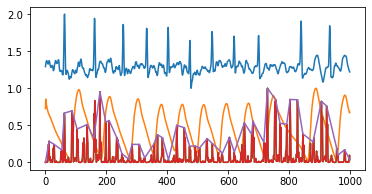

In [4]:
for j in range(len(label)):
    ecgs = ecg[j,:]
    ppgs = ppg[j,:]
    sig = grad[j,:]
    fig, ax = plt.subplots(figsize=(6,3))
    plt.plot(ecgs+1)
    plt.plot(ppgs)        
    plt.plot(sig)
    Len = 20
    snum = np.fix(len(sig)/Len).astype(int)
    plt.plot(sig)
    Index = [0]
    for i in range(snum):
        temp = sig[i*Len:(i+1)*Len]
        Index.append(i*Len+np.argmax(temp))
    Index.append(999)
    plt.plot(Index,sig[Index])
    x = np.arange(1000)  
    f=interpolate.interp1d(Index,sig[Index],kind='linear')
    ynew=f(x)
    grad[j,:] = ynew

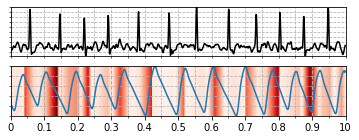

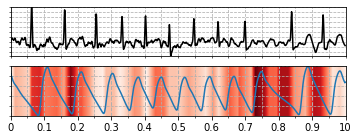

In [5]:
from matplotlib.pyplot import MultipleLocator
barprops = dict(aspect='auto', cmap='Reds', interpolation='nearest')
for i in range(len(label)):
    #fig, ax = plt.subplots(figsize=(6,4))
    fig = plt.figure(figsize=(6,2))
    plt.subplot(2,1,1)
    ax = plt.gca()
    plt.plot(ecg[i,:],'k')
    x_major_locator=MultipleLocator(100)
    x_minor_locator=MultipleLocator(50)
    y_major_locator=MultipleLocator(0.2)
    y_minor_locator=MultipleLocator(0.1)
    
    ax.xaxis.set_major_locator(x_major_locator)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)

    plt.grid(which='major',axis='x',linewidth=1, linestyle='--')
    ax.grid(which='minor',axis='x',linestyle='--',linewidth=0.75)
    plt.grid(which='major',axis='y',linewidth=1, linestyle='--')
    ax.grid(which='minor',axis='y',linestyle='--',linewidth=0.75)
    plt.axis([0, 1000, 0, 1])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('12')
    ##
    plt.subplot(2,1,2)
    ax = plt.gca()
    plt.plot(ppg[i,:]/2)
    plt.imshow(grad[i,:].reshape(1,-1),**barprops)
    x_major_locator=MultipleLocator(100)
    x_minor_locator=MultipleLocator(50)
    y_major_locator=MultipleLocator(0.2)
    y_minor_locator=MultipleLocator(0.1)
    
    ax.xaxis.set_major_locator(x_major_locator)
    ax.xaxis.set_minor_locator(x_minor_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    ax.yaxis.set_minor_locator(y_minor_locator)

    plt.grid(which='major',axis='x',linewidth=1, linestyle='--')
    ax.grid(which='minor',axis='x',linestyle='--',linewidth=0.75)
    plt.grid(which='major',axis='y',linewidth=1, linestyle='--')
    ax.grid(which='minor',axis='y',linestyle='--',linewidth=0.75)
    plt.axis([0, 1000, 0, 0.5])
    
    ax.set_xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
    ax.set_xticklabels(['0','0.1', '0.2','0.3', '0.4','0.5','0.6', '0.7','0.8', '0.9','10'])
    #plt.xticks([])
    plt.yticks([])